In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os
import sys

src_dir = './../../src/'
sys.path[0] = src_dir

import matplotlib.pyplot as plt

import glob

import numpy as np
import pandas as pd
import seaborn as sns

from collections import OrderedDict

from access_biology_data import meta, relations, properties
from access_literature_data import medline
from access_science_shared import standardizer 

In [4]:
sys.path.append('./../src/')
from aging_tools import inout, export
from access_aging_data import earlier_studies, chaperome, companions, sequencing

In [5]:
from narrative import nar181026_heat_confidence_genes
# from narrative import nar181101_single_cell
from narrative import nar181205_networks

In [6]:
from scipy.stats import spearmanr

In [7]:
save_images = False

In [8]:
ref_genes = standardizer.reference_genes(9606, 'orp')

pr = properties.genbank_validated_rna(9606)[['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']].rename(columns={
    'Genbank_validated_RNA: full_SumACGT': 'length'
})

pr.loc[:, 'log_length'] = np.log10(pr['length'])

/Users/tstoeger/opt/miniconda3/envs/aging/lib/python3.7/site-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


In [9]:
# agg = []

# stem = inout.get_internal_path('datasets/tstoeger/190318_from_gtex_by_rgrant')

# g = pd.Series(glob.glob(
#     '{}/*'.format(stem))).to_frame('path')
# g['file'] = g['path'].str.extract('.*/(.*)$')
# g['gender'] = g['file'].str.extract('190503GTEx_Science_2015_(.*)_subregion')
# g['region'] = g['file'].str.extract('190503GTEx_Science_2015_.*_subregion_(.*)_subset')


# for j in g.index:
#     p = '{}/{}*'.format(os.path.join(stem, g.loc[j, 'file']),g.loc[j, 'file'])
    
#     curr_gender = g.loc[j, 'gender']
#     curr_region = g.loc[j, 'region']
    
#     h = glob.glob(p)

#     if len(h)>0:
#         h = pd.Series(glob.glob(p)).to_frame('path')
#         h['file'] = h['path'].str.extract('.*/(.*)$')
#         h['older'] = h['file'].str.extract('.*_([0-9]*)_vs_[0-9]*_dge.csv').astype(float)
#         h['younger'] = h['file'].str.extract('.*_[0-9]*_vs_([0-9]*)_dge.csv').astype(float)

#         for jj in h.index:
#             df = pd.read_csv(
#                 h.loc[jj, 'path'],
#                 usecols=['entrezgene', 'log2FoldChange', 'padj']
#             ).dropna(
#                 subset=['padj']
#             ).rename(columns={'entrezgene': 'gene_ncbi'})
            
#             df.loc[:, 'significant'] = df.loc[:, 'padj'] < 0.05

#             df = df[df['gene_ncbi'].isin(ref_genes)]
#             df = pd.merge(df, pr)
#             r, p = spearmanr(df['log2FoldChange'], df['length'])
            
#             stats = dict()
#             stats['gender'] = curr_gender
#             stats['region'] = curr_region
#             stats['rho'] = r
#             stats['pval'] = p
#             stats['younger'] = h.loc[jj, 'younger']
#             stats['older'] = h.loc[jj, 'older']
#             stats['significant'] = df['significant'].sum()
            
#             agg.append(stats)

# master = pd.DataFrame(agg)

# f = master['region'].str.startswith('Cells')

# master = master[~f]

In [10]:
# master['condition'] =  master['gender'] + '_' + master['region'] + '_' + \
#                   master['older'].astype(int).astype(str) + \
#                   '_vs_' + master['younger'].astype(int).astype(str)

# # all_de = master.copy()

In [11]:
# p = export.get_material_path('190428_chache_tstoeger_190427_gtex_with_tilt/all_de.csv')
# all_de = pd.read_csv(p).dropna(subset=['padj'])

In [12]:
p = export.get_material_path('190428_chache_tstoeger_190427_gtex_with_tilt/stats_on_imbalance.xlsx')
tilt = pd.read_excel(p)

In [13]:
tilt.head()

,condition,tilt,pval,tilt_orp,pval_orp,gender,tissue,younger,older
0,females_Adipose_Subcutaneous_3_vs_2,0.210298,2.384289e-172,0.212675,1.699691e-175,female,Adipose - Subcutaneous,2,3
1,females_Adipose_Subcutaneous_4_vs_2,0.146914,2.880636e-84,0.147476,1.654229e-84,female,Adipose - Subcutaneous,2,4
2,females_Adipose_Subcutaneous_4_vs_3,-0.115481,1.456786e-52,-0.117334,5.719052e-54,female,Adipose - Subcutaneous,3,4
3,females_Adipose_Subcutaneous_5_vs_2,0.071833,2.592071e-21,0.072112,2.264565e-21,female,Adipose - Subcutaneous,2,5
4,females_Adipose_Subcutaneous_5_vs_3,-0.180310,6.988833e-127,-0.182700,1.148451e-129,female,Adipose - Subcutaneous,3,5


In [14]:
tilt = tilt.rename(columns={'tilt': 'rho'})

In [15]:
# tilt = master.copy()

In [16]:
p = export.get_material_path('190428_chache_tstoeger_190427_gtex_with_tilt/all_de.csv')
all_de = pd.read_csv(p).dropna(subset=['padj'])

In [17]:
all_de.loc[:, 'reduced_tissue'] = all_de['tissue'].str.replace(
    ' - ', '_').str.replace(' ', '_').str.replace(
    '-', '_').str.replace('(','').str.replace(')', '')

all_de.loc[:, 'condition'] = all_de.loc[:, 'gender'] + 's_' + all_de['reduced_tissue'] + '_' + \
    all_de['older'].astype(int).astype(str) + '_vs_' + all_de['younger'].astype(int).astype(str)

In [18]:
# agg = []

# stem = inout.get_internal_path('datasets/tstoeger/190318_from_gtex_by_rgrant')

# g = pd.Series(glob.glob(
#     '{}/*'.format(stem))).to_frame('path')
# g['file'] = g['path'].str.extract('.*/(.*)$')
# g['gender'] = g['file'].str.extract('190503GTEx_Science_2015_(.*)_subregion')
# g['region'] = g['file'].str.extract('190503GTEx_Science_2015_.*_subregion_(.*)_subset')


# for j in g.index:
#     p = '{}/{}*'.format(os.path.join(stem, g.loc[j, 'file']),g.loc[j, 'file'])
    
#     curr_gender = g.loc[j, 'gender']
#     curr_region = g.loc[j, 'region']
    
#     h = glob.glob(p)

#     if len(h)>0:
#         h = pd.Series(glob.glob(p)).to_frame('path')
#         h['file'] = h['path'].str.extract('.*/(.*)$')
#         h['older'] = h['file'].str.extract('.*_([0-9]*)_vs_[0-9]*_dge.csv').astype(float)
#         h['younger'] = h['file'].str.extract('.*_[0-9]*_vs_([0-9]*)_dge.csv').astype(float)

#         for jj in h.index:
#             df = pd.read_csv(
#                 h.loc[jj, 'path'],
#                 usecols=['entrezgene', 'log2FoldChange', 'padj']
#             ).dropna(
#                 subset=['padj']
#             ).rename(columns={'entrezgene': 'gene_ncbi'})
            
#             df.loc[:, 'significant'] = df.loc[:, 'padj'] < 0.05

#             df = df[df['gene_ncbi'].isin(ref_genes)]
            
#             if df.shape[0] > 0:

#                 df.loc[:, 'gender'] = curr_gender
#                 df.loc[:, 'region'] = curr_region
#                 df['younger'] = h.loc[jj, 'younger']
#                 df['older'] = h.loc[jj, 'older']

#                 agg.append(df)
                
# master = pd.concat(agg) 
# master['condition'] =  master['gender'] + '_' + master['region'] + '_' + \
#       master['older'].astype(int).astype(str) + \
#       '_vs_' + master['younger'].astype(int).astype(str)

# all_de = master.copy()    

In [19]:
tilt.sort_values('rho', ascending=True)

,condition,rho,pval,tilt_orp,pval_orp,gender,tissue,younger,older
161,females_Brain_Frontal_Cortex_BA9_5_vs_3,-0.401803,0.000000e+00,-0.403624,0.000000e+00,female,Brain - Frontal Cortex (BA9),3,5
163,females_Brain_Frontal_Cortex_BA9_6_vs_3,-0.374689,0.000000e+00,-0.376297,0.000000e+00,female,Brain - Frontal Cortex (BA9),3,6
757,males_Brain_Nucleus_accumbens_basal_ganglia_7_...,-0.364078,0.000000e+00,-0.364790,0.000000e+00,male,Brain - Nucleus accumbens (basal ganglia),5,7
756,males_Brain_Nucleus_accumbens_basal_ganglia_7_...,-0.361873,0.000000e+00,-0.362477,0.000000e+00,male,Brain - Nucleus accumbens (basal ganglia),4,7
162,females_Brain_Frontal_Cortex_BA9_5_vs_4,-0.357576,0.000000e+00,-0.359229,0.000000e+00,female,Brain - Frontal Cortex (BA9),4,5
...,...,...,...,...,...,...,...,...,...
320,females_Heart_Atrial_Appendage_6_vs_5,0.242893,1.423385e-231,0.243039,9.568915e-231,female,Heart - Atrial Appendage,5,6
165,females_Brain_Frontal_Cortex_BA9_6_vs_5,0.259514,1.125529e-264,0.260273,4.934263e-265,female,Brain - Frontal Cortex (BA9),5,6
1049,males_Skin_Sun_Exposed_Lower_leg_7_vs_6,0.262777,7.465161e-273,0.263265,1.389252e-272,male,Skin - Sun Exposed (Lower leg),6,7
124,females_Brain_Cerebellar_Hemisphere_6_vs_5,0.274352,6.353944e-296,0.276232,1.029915e-298,female,Brain - Cerebellar Hemisphere,5,6


In [20]:
# all_de, detection, mice_in_comparisons, triplicate_series = nar181026_heat_confidence_genes.load_detection(
#     detection_column='padj')


# tissues_to_consider = ['BAT', 'Blood', 'GutEP', 'MuscSat', 'Adrenal', 'Kidney',
#        'Heart', 'Liver', 'Skin', 'Stomach', 'Brain', 'SI',
#        'LI', 'Cerebellum', 'WAT', 'Esophagus', 'Lung'] 

# all_de = all_de[(all_de['tissue'].isin(tissues_to_consider)) & (all_de['pfu']==0)]

# prime_genes = nar181101_single_cell.prime_genes(all_de, tissues=tissues_to_consider, pfus=[0])

In [21]:
# pr = properties.genbank_validated_rna(10090)[['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']].rename(columns={
#     'Genbank_validated_RNA: full_SumACGT': 'length'
# })

# pr.loc[:, 'log_length'] = np.log10(pr['length'])

In [22]:
from natsort import natsorted

In [23]:
conditions = natsorted(all_de['condition'].unique())

In [24]:
condition = 'males_Brain_Frontal_Cortex_BA9_7_vs_2'  # 'males_Brain_Cerebellar_Hemisphere_5_vs_2' # 'males_Heart_Left_Ventricle_6_vs_4' #

In [25]:
all_de.head()

,gene_ncbi,o_over_y,pvalue,padj,tissue,younger,older,gender,reduced_tissue,condition
0,5266,-0.507525,0.204765,0.492253,Adipose - Subcutaneous,2.0,3.0,male,Adipose_Subcutaneous,males_Adipose_Subcutaneous_3_vs_2
1,2070,1.157510,0.000066,0.012469,Adipose - Subcutaneous,2.0,3.0,male,Adipose_Subcutaneous,males_Adipose_Subcutaneous_3_vs_2
2,1149,-0.213831,0.579361,0.804020,Adipose - Subcutaneous,2.0,3.0,male,Adipose_Subcutaneous,males_Adipose_Subcutaneous_3_vs_2
4,4327,-0.051246,0.859720,0.949977,Adipose - Subcutaneous,2.0,3.0,male,Adipose_Subcutaneous,males_Adipose_Subcutaneous_3_vs_2
5,9136,-0.442423,0.017723,0.147885,Adipose - Subcutaneous,2.0,3.0,male,Adipose_Subcutaneous,males_Adipose_Subcutaneous_3_vs_2


In [26]:
d = all_de[
    (all_de['condition']==condition) & 
    (all_de['gene_ncbi'].isin(ref_genes))
].rename(columns={'log2FoldChange': 'o_over_y'})

In [27]:
e = pd.merge(d[['gene_ncbi', 'o_over_y', 'padj']], pr[['gene_ncbi', 'log_length']])

In [28]:
e.loc[:, 'is_significant'] = e['padj'] < 0.05

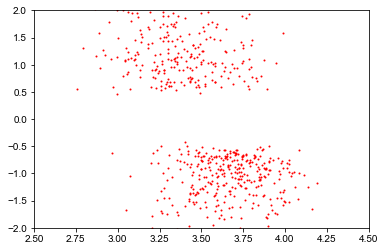

In [29]:

f = e['padj'] < 0.05
plt.scatter(
    e.loc[f, 'log_length'], e.loc[f, 'o_over_y'], c='red', s=1)

plt.ylim([-2, 2])
plt.xlim([2.5, 4.5])

if save_images:
    export.export_image(
        '190429_visualize_imbalance_and_significant_genes_human_lesser/sole_scatter.pdf')




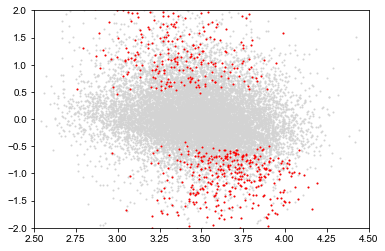

In [30]:
plt.scatter(
    e.loc[:, 'log_length'], e.loc[:, 'o_over_y'], c='lightgrey', s=1)


f = e['padj'] < 0.05
plt.scatter(
    e.loc[f, 'log_length'], e.loc[f, 'o_over_y'], c='red', s=1)

plt.ylim([-2, 2])
plt.xlim([2.5, 4.5])

if save_images:
    export.export_image(
        '190429_visualize_imbalance_and_significant_genes_human_lesser/light_scatter.pdf')



In [31]:
e.corr('spearman')

,gene_ncbi,o_over_y,padj,log_length,is_significant
gene_ncbi,1.000000,-0.005613,0.029250,-0.009766,0.008967
o_over_y,-0.005613,1.000000,0.016972,-0.198508,-0.047847
padj,0.029250,0.016972,1.000000,-0.069456,-0.348718
log_length,-0.009766,-0.198508,-0.069456,1.000000,0.045074
is_significant,0.008967,-0.047847,-0.348718,0.045074,1.000000


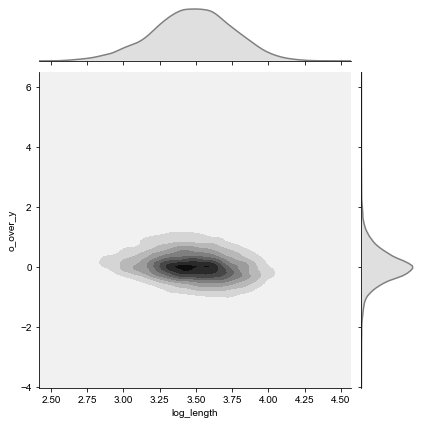

In [32]:
sns.jointplot(x='log_length', y='o_over_y', data=e, kind='kde',color='grey')

if save_images:
    export.export_image(
        '190429_visualize_imbalance_and_significant_genes_human_lesser/grey.pdf')



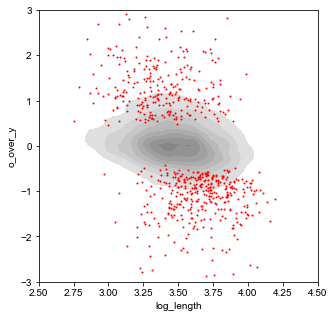

In [33]:
plt.figure(figsize=(5, 5))

sns.kdeplot(
    e.loc[:, 'log_length'], e.loc[:, 'o_over_y'], color='gray',shade=True, shade_lowest=False)


f = e['padj'] < 0.05
plt.scatter(
    e.loc[f, 'log_length'], e.loc[f, 'o_over_y'], c='red', s=1)

plt.ylim([-3, 3])
plt.xlim([2.5, 4.5])

if save_images:
    export.export_image(
        '190429_visualize_imbalance_and_significant_genes_human_lesser/hybrid_scatter.pdf')





In [34]:
tilt[tilt['condition']==condition]

,condition,rho,pval,tilt_orp,pval_orp,gender,tissue,younger,older
719,males_Brain_Frontal_Cortex_BA9_7_vs_2,-0.18821,5.386534e-136,-0.187658,1.328047e-134,male,Brain - Frontal Cortex (BA9),2,7


In [35]:
e['up'] = e['o_over_y'] > 0

In [36]:
e[f]['up'].value_counts()

False    349
True     266
Name: up, dtype: int64

In [41]:
save_images = True

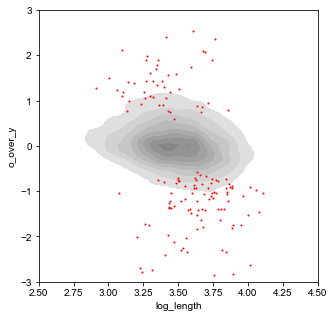

In [42]:
plt.figure(figsize=(5, 5))

sns.kdeplot(
    e.loc[:, 'log_length'], e.loc[:, 'o_over_y'], color='gray',shade=True, shade_lowest=False)


f = e['padj'] < 0.01
plt.scatter(
    e.loc[f, 'log_length'], e.loc[f, 'o_over_y'], c='red', s=1)

plt.ylim([-3, 3])
plt.xlim([2.5, 4.5])

if save_images:
    export.export_image(
        '190429_visualize_imbalance_and_significant_genes_human_lesser/hybrid_scatter_01.pdf')






In [43]:
e['up'] = e['o_over_y'] > 0

In [44]:
e[f]['up'].value_counts()

False    92
True     53
Name: up, dtype: int64